# ABOUT PROJECT :: BANK CUSTOMER CLUSTERING
THE AIM OF THE PROJECT IS TO CLUSTER CUSTOMERS BASED ON THEIR VARIOUS BEHAVIORAL ATTRIBUTES SUCH AS AGE ,MARITAL STATUS,VAR RATE
ETC. WE WILL ACCOMPLISH THIS BY THE USE OF CLUSTERING AND KNNEIGHBOURS CLASSIFIER

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df = pd.read_csv("C:\\Datasets\\Bank Marketing\\bankmarketing.csv")

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df['y'].value_counts().head()

no     36548
yes     4640
Name: y, dtype: int64

In [16]:
df.isnull().sum() # No missing value 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
df.shape

(41188, 21)

In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
df['month'].value_counts().head(10)

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [21]:
df['default'].value_counts().head()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [39]:
def general_information(column,df=df):
    """This function takes in a column and returns some basic information about the column .The information
    includes the number of unique values in each column and the most frequent values in column.The column choice is upto the user
    Args:
    column: This is the column under study ,based on the user choice 
    df: Dataframe - The dataframe that houses the column 
    
    Returns :
    value counts ,number of unique columns"""
    print(f"We are studying {column} |column")
    print("\n")
    print(f"The number of unique values in {column} are/is {df[column].nunique()}")
    print("\n")
    print(f"The Ten most frequent values/items in order of appearance \n {df[column].value_counts().head(10)}")

In [45]:
general_information('age') # The majority of our customers are aged 31 

We are studying age |column


The number of unique values in age are/is 78


The Ten most frequent values/items in order of appearance 
 31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
Name: age, dtype: int64


In [54]:
# We want to group customers with age ,marital status ,education,default,housing,y
columns_to_study = ['age' ,'marital'  ,'education','default','housing','y']
columns_to_study

['age', 'marital', 'education', 'default', 'housing', 'y']

In [56]:
for column in columns_to_study:
    general_information(column) # married customers are a bunch ,also those with university degrees

We are studying age |column


The number of unique values in age are/is 78


The Ten most frequent values/items in order of appearance 
 31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
Name: age, dtype: int64
We are studying marital |column


The number of unique values in marital are/is 4


The Ten most frequent values/items in order of appearance 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
We are studying education |column


The number of unique values in education are/is 8


The Ten most frequent values/items in order of appearance 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
We are studying default |column


The number of unique values in default ar

# DATA VISUALIZATION

In [60]:
df[columns_to_study].dtypes

age           int64
marital      object
education    object
default      object
housing      object
y            object
dtype: object

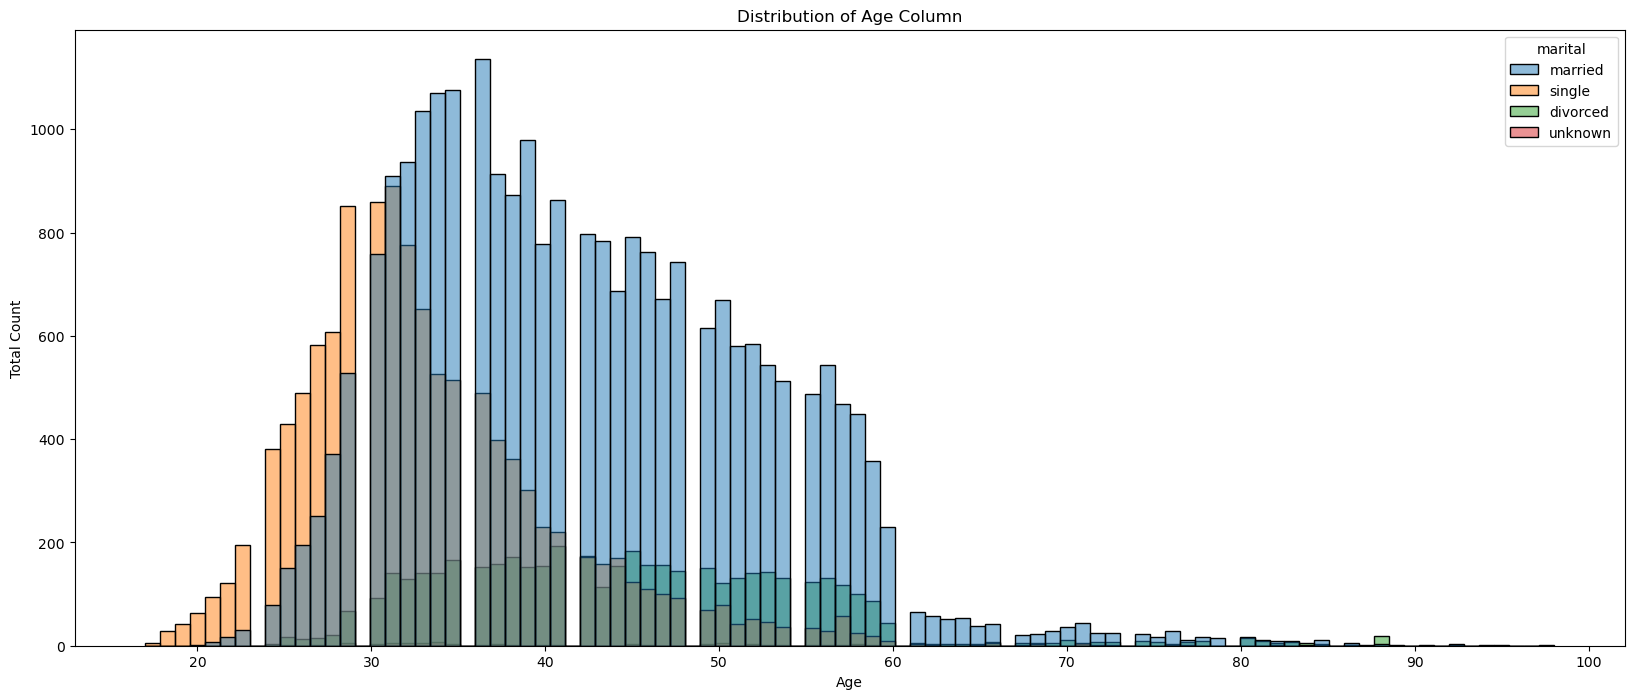

In [64]:
# For age I will plot a histogram and a countplot for the remaining
fig=plt.figure(figsize=(20,8))
sns.histplot(x='age',data=df,hue='marital',color='black')
plt.xlabel("Age")
plt.ylabel("Total Count")
plt.title("Distribution of Age Column")
plt.show() # We can clearly see 31 as the most frequent age for our customers

In [74]:
# we will do a countplot for our categorical columns
def draw_countplot(column,hue=None,data=df):
    fig = plt.figure(figsize=(20,8))
    sns.countplot(x=column,data=data,hue=hue)
    plt.xlabel(column)
    plt.ylabel("Total Count")
    plt.show()

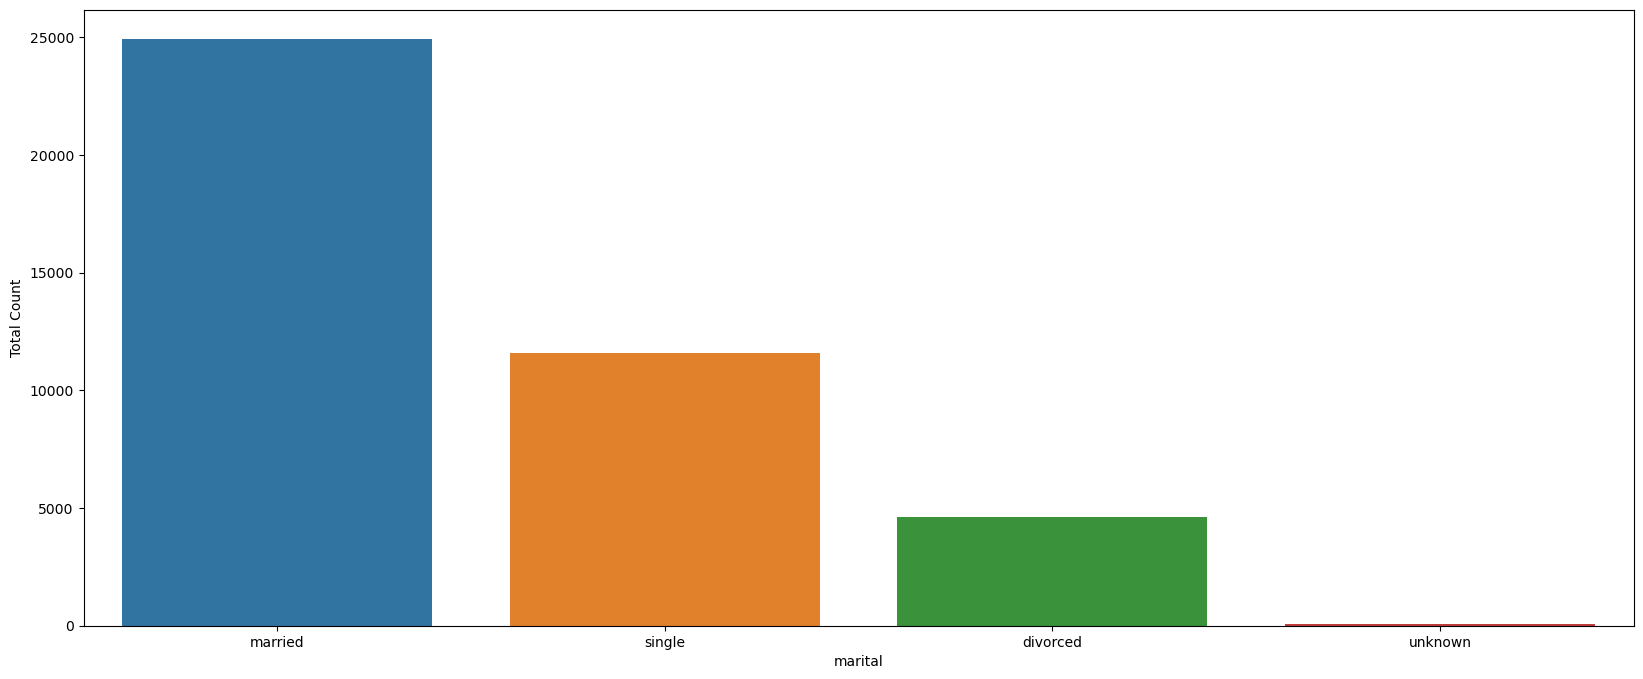

In [75]:
draw_countplot('marital')

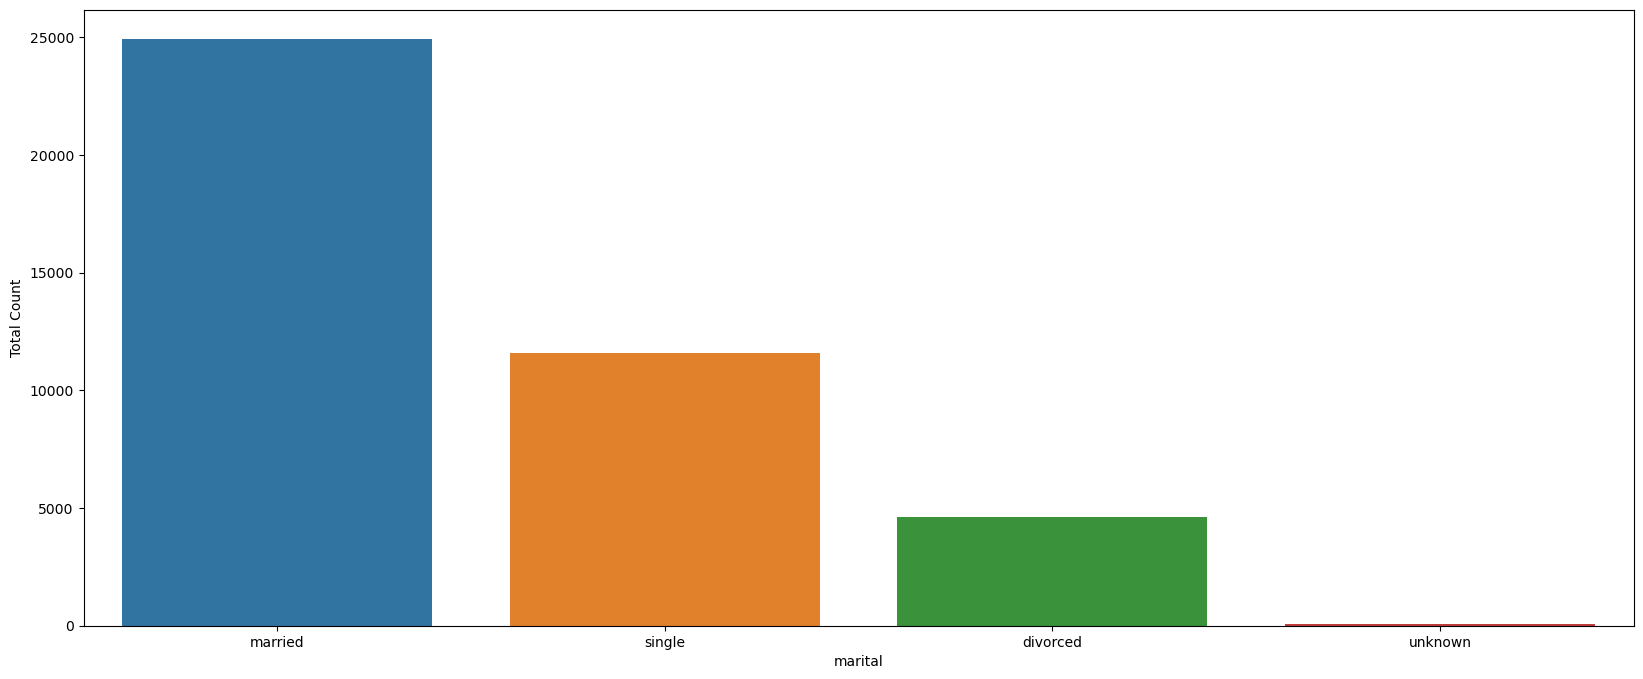

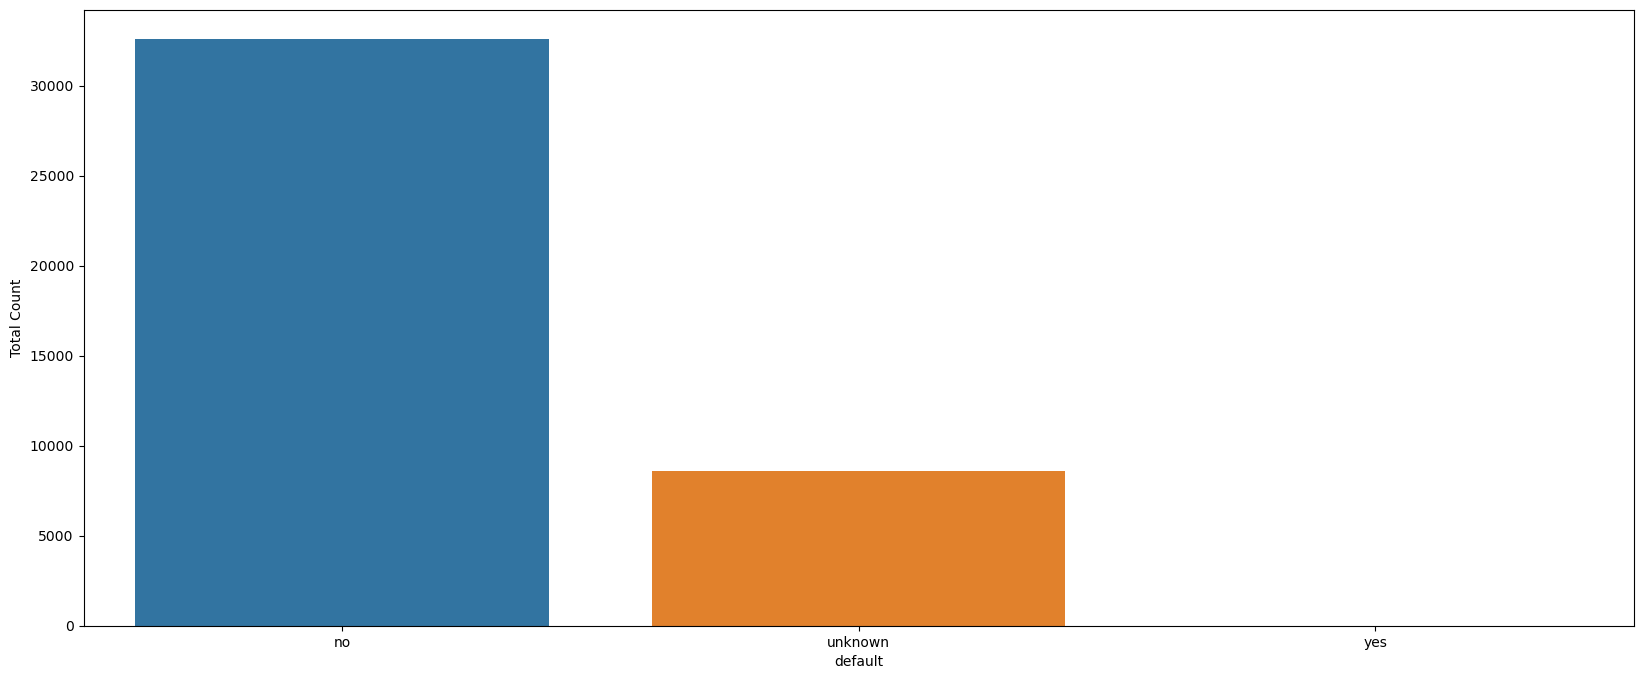

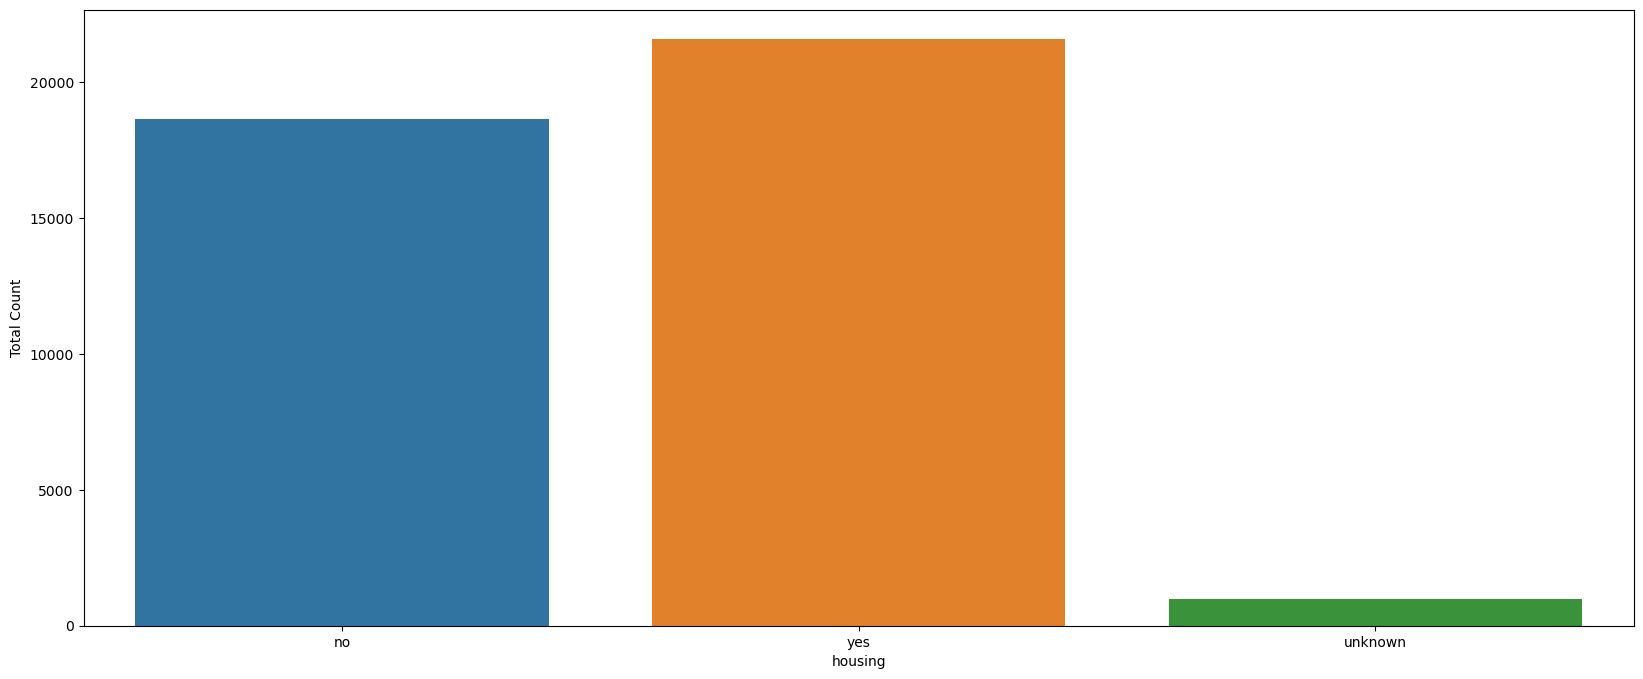

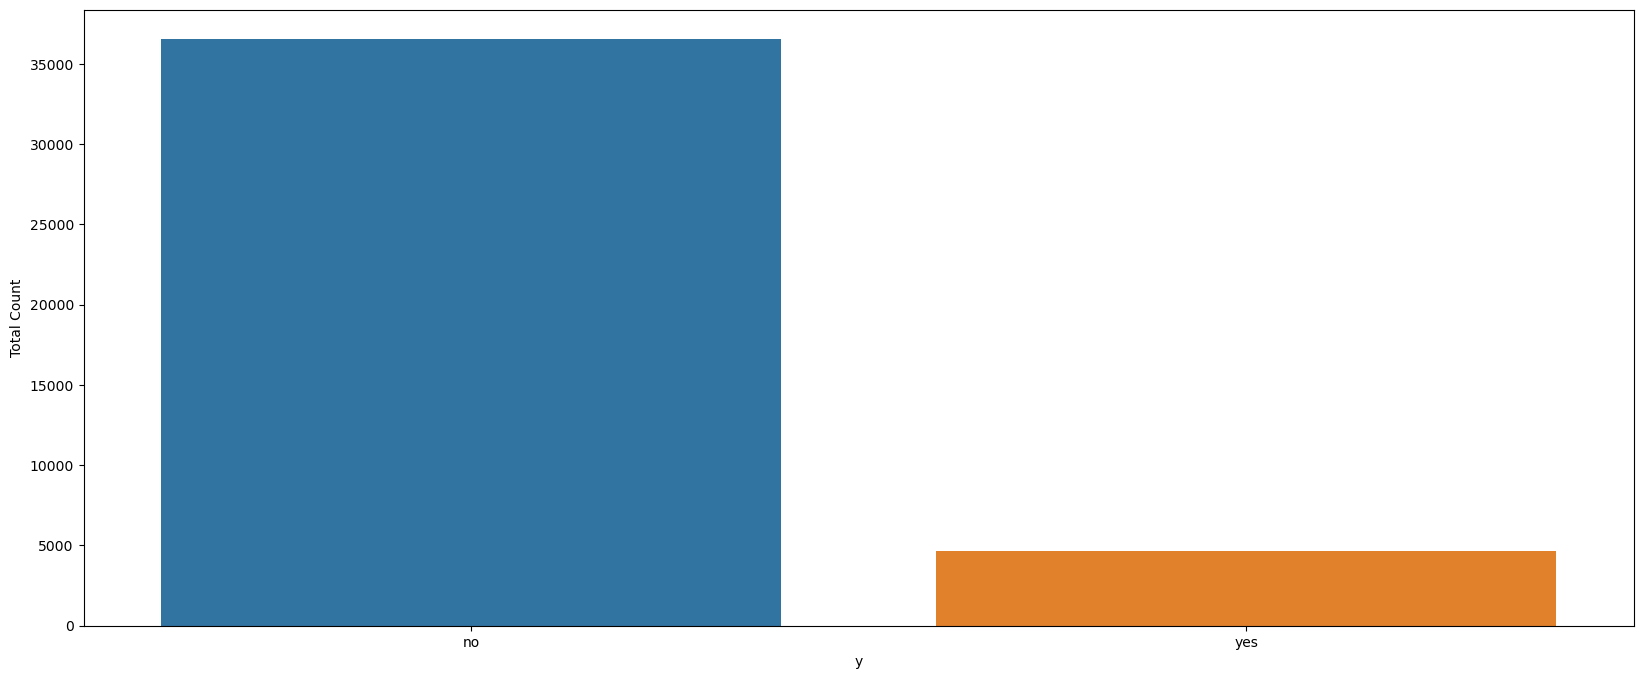

In [76]:
for column in columns_to_study :
    if column in ['age','education']:
        pass
    else :
        draw_countplot(column)

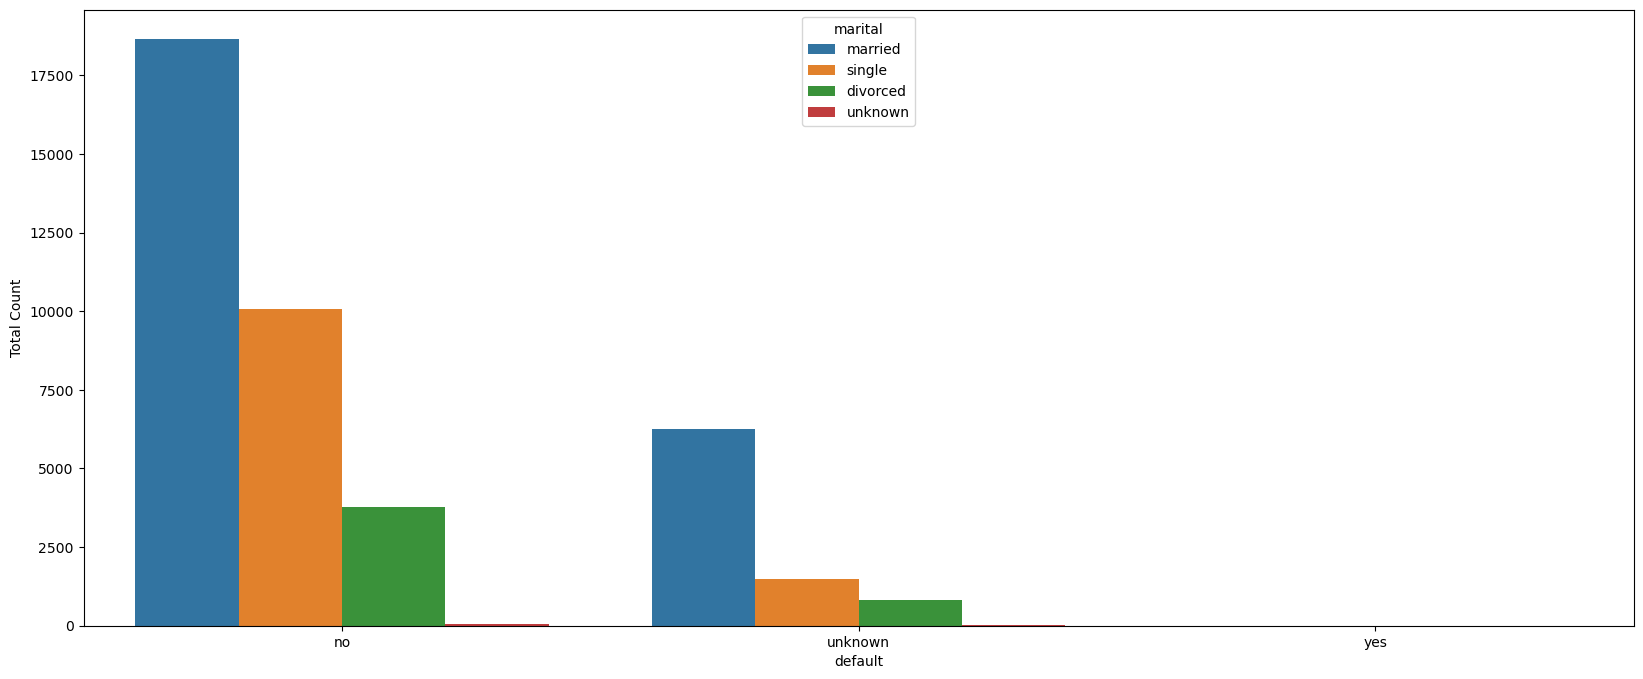

In [77]:
draw_countplot('default',hue='marital')

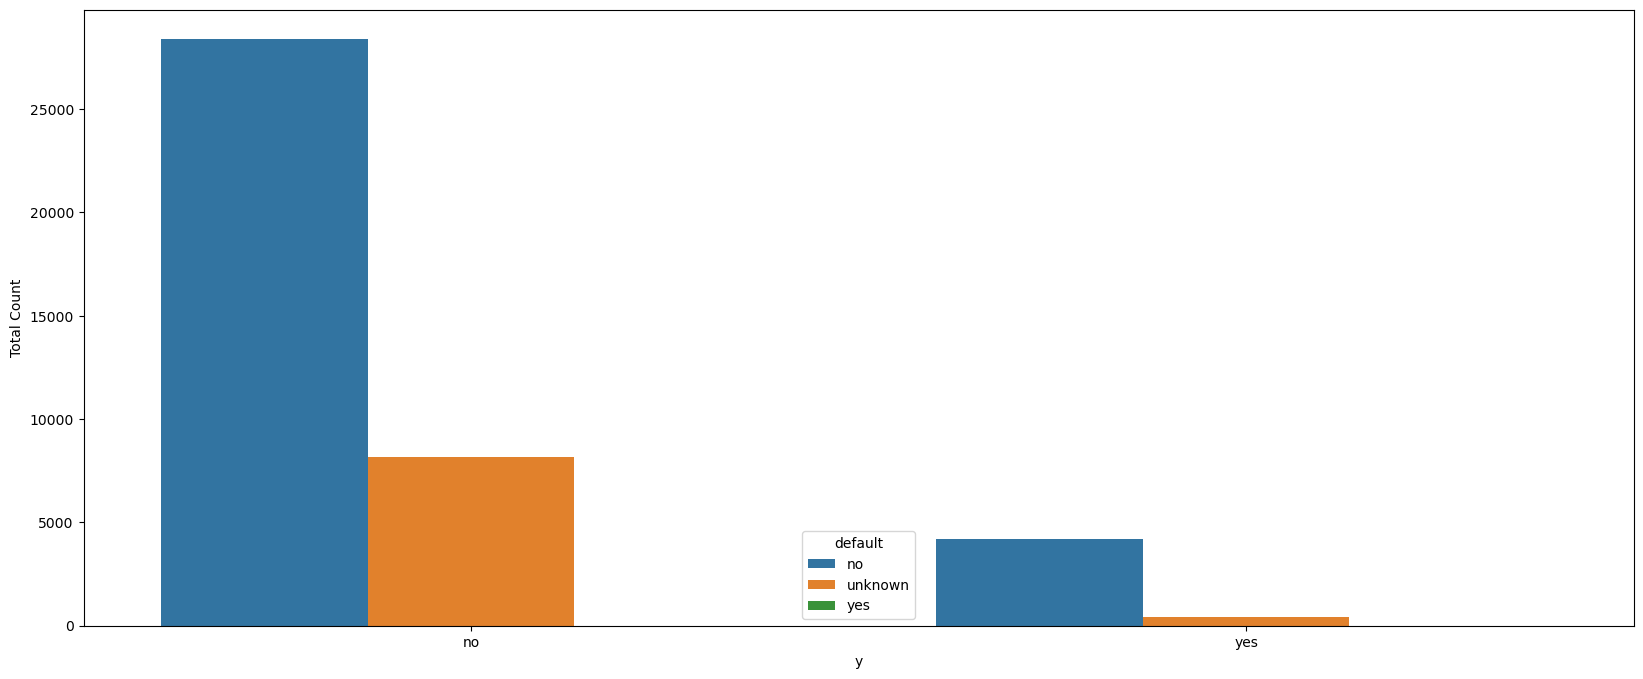

In [78]:
draw_countplot('y',hue='default')

In [80]:
# We can convert categorical features into continous features using Label Encoder
lbl_encoder = {}
for column in  columns_to_study :
    if column in 'age':
        pass
    else :
        lbl_encoder = LabelEncoder()
        df[column] = lbl_encoder.fit_transform(df[column])

In [81]:
df[columns_to_study]

,age,marital,education,default,housing,y
0,56,1,0,0,0,0
1,57,1,3,1,0,0
2,37,1,3,0,2,0
3,40,1,1,0,0,0
4,56,1,3,0,0,0
...,...,...,...,...,...,...
41183,73,1,5,0,2,1
41184,46,1,5,0,0,0
41185,56,1,6,0,2,0
41186,44,1,5,0,0,1


In [102]:
for column in  df.columns :
    if column in ['job','loan','contact','month','day_of_week','poutcome']:
        lbl_encoder = LabelEncoder()
        df[column] = lbl_encoder.fit_transform(df[column])
    else :
        pass 


In [103]:
other_categorical_columns = ['job','loan','contact','month','day_of_week','poutcome']
categorical_columns = columns_to_study+other_categorical_columns


In [104]:
categorical_columns

['age',
 'marital',
 'education',
 'default',
 'housing',
 'y',
 'job',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [105]:
df[categorical_columns].head()

,age,marital,education,default,housing,y,job,loan,contact,month,day_of_week,poutcome
0,56,1,0,0,0,0,3,0,1,6,1,1
1,57,1,3,1,0,0,7,0,1,6,1,1
2,37,1,3,0,2,0,7,0,1,6,1,1
3,40,1,1,0,0,0,0,0,1,6,1,1
4,56,1,3,0,0,0,7,2,1,6,1,1


In [112]:
# Scaling all the other columns in our dataframe
continous_columns = df.drop(categorical_columns,axis=1)

In [108]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [115]:
continous_columns = StandardScaler().fit_transform(continous_columns)

In [119]:
df[categorical_columns]

,age,marital,education,default,housing,y,job,loan,contact,month,day_of_week,poutcome
0,56,1,0,0,0,0,3,0,1,6,1,1
1,57,1,3,1,0,0,7,0,1,6,1,1
2,37,1,3,0,2,0,7,0,1,6,1,1
3,40,1,1,0,0,0,0,0,1,6,1,1
4,56,1,3,0,0,0,7,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,5,0,2,1,5,0,0,7,0,1
41184,46,1,5,0,0,0,1,0,0,7,0,1
41185,56,1,6,0,2,0,5,0,0,7,0,1
41186,44,1,5,0,0,1,9,0,0,7,0,1


In [120]:
X = df.drop(['y'],axis=1)
y = df['y']

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)

In [123]:
from sklearn.metrics import classification_report,confusion_matrix
k_classifier = KNeighborsClassifier(n_neighbors=1)
k_classifier.fit(X_train,y_train)
predictions = k_classifier.predict(X_test)
print(classification_report(y_test,predictions))

C:\Users\EDGAR MUYALE DAVIES\anaconda3\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7279
           1       0.51      0.49      0.50       959

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.88      0.89      0.89      8238



# CLUSTERING  USING KMEANS  FOR SELECTED COLUMNS

In [127]:
cluster_columns = df[['age','marital','education','y','default','housing']]
cluster_df = pd.DataFrame(cluster_columns)
cluster_df.columns = ['age','marital','education','y','default','housing']
cluster_df

,age,marital,education,y,default,housing
0,56,1,0,0,0,0
1,57,1,3,0,1,0
2,37,1,3,0,0,2
3,40,1,1,0,0,0
4,56,1,3,0,0,0
...,...,...,...,...,...,...
41183,73,1,5,1,0,2
41184,46,1,5,0,0,0
41185,56,1,6,0,0,2
41186,44,1,5,1,0,0


In [128]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_df)

KMeans(n_clusters=3)

In [129]:
kmeans.labels_

array([2, 2, 1, ..., 2, 0, 2])

In [130]:
kmeans.cluster_centers_

array([[43.4304073 ,  1.01376404,  3.53995787,  0.08272472,  0.27422753,
         1.05786517],
       [31.42862202,  1.39624646,  4.01866653,  0.1203966 ,  0.12879401,
         1.07916835],
       [56.93328691,  0.87284123,  3.41072423,  0.15069638,  0.29972145,
         1.07869081]])

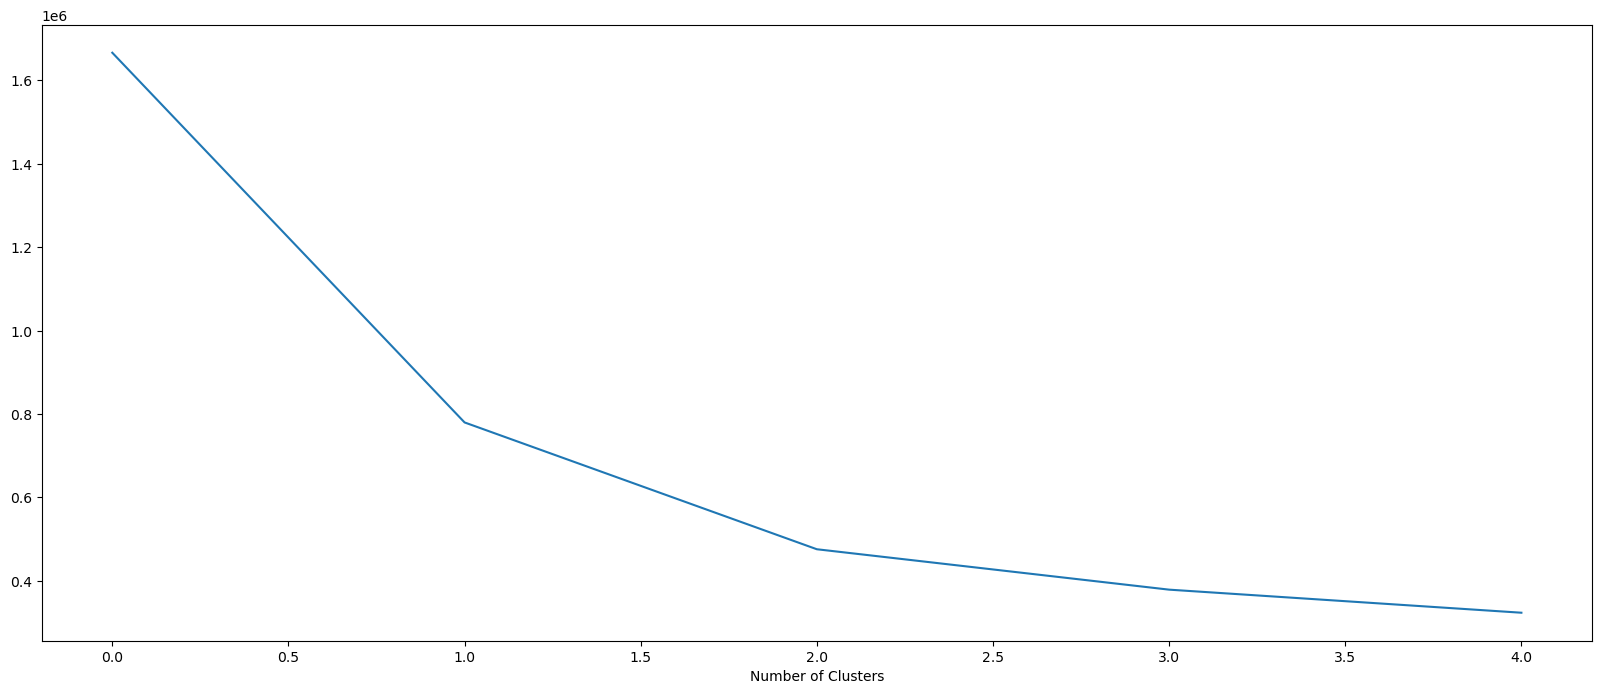

In [133]:
# Determining the Optimal number of clusters
clust =[] 
range_num_clusters = [2,4,6,8,10]
for num_clusters in range_num_clusters :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cluster_df)
    clust.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.xlabel("Number of Clusters")
plt.plot(clust)
plt.show()

In [135]:
cluster_df['Cluster_Id'] = kmeans.labels_

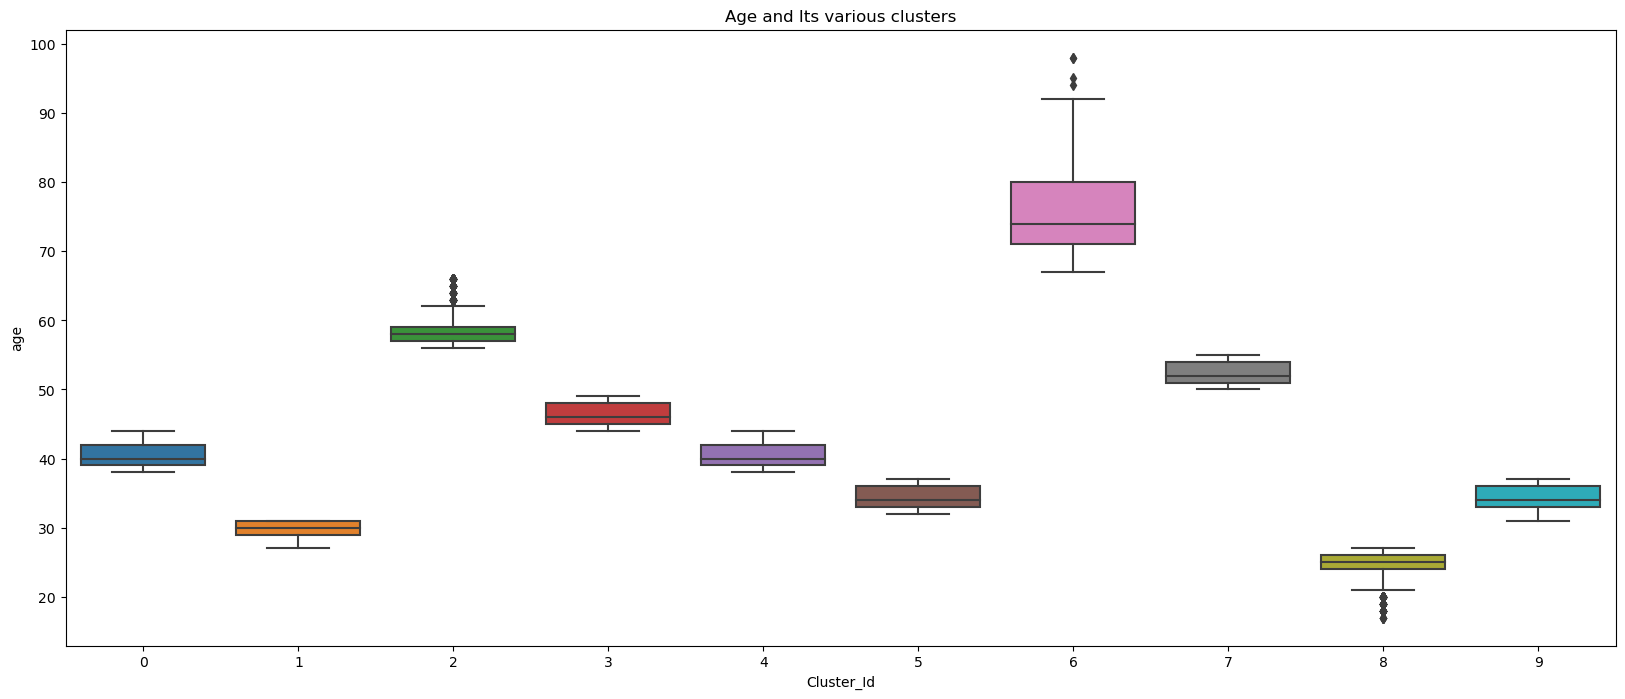

In [137]:
plt.figure(figsize=(20,8))
sns.boxplot(y='age',x='Cluster_Id',data=cluster_df)
plt.title("Age and Its various clusters")
plt.show()

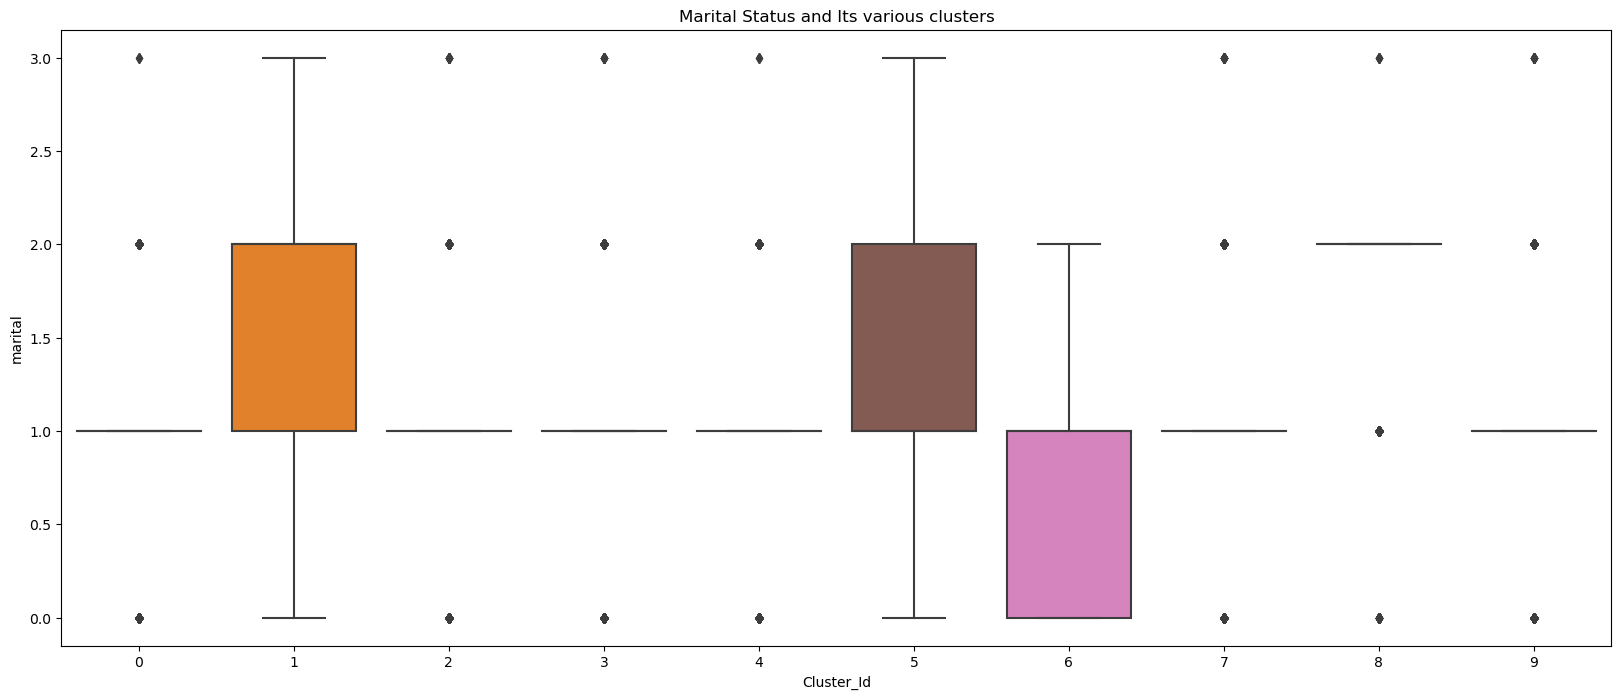

In [139]:
plt.figure(figsize=(20,8))
sns.boxplot(y='marital',x='Cluster_Id',data=cluster_df)
plt.title("Marital Status and Its various clusters")
plt.show()

# CLUSTERING FOR ALL COLUMNS

In [140]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [179]:
k_Means = KMeans(n_clusters=1)
k_Means.fit(X)

KMeans(n_clusters=1)

In [180]:
k_Means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
k_Means.cluster_centers_

array([[ 4.00240604e+01,  3.72457997e+00,  1.17276877e+00,
         3.74718365e+00,  2.08871516e-01,  1.07171992e+00,
         3.27425464e-01,  3.65252015e-01,  4.23086821e+00,
         2.00461299e+00,  2.58285010e+02,  2.56759250e+00,
         9.62475454e+02,  1.72962999e-01,  9.30101000e-01,
         8.18855006e-02,  9.35756644e+01, -4.05026003e+01,
         3.62129081e+00,  5.16703591e+03]])

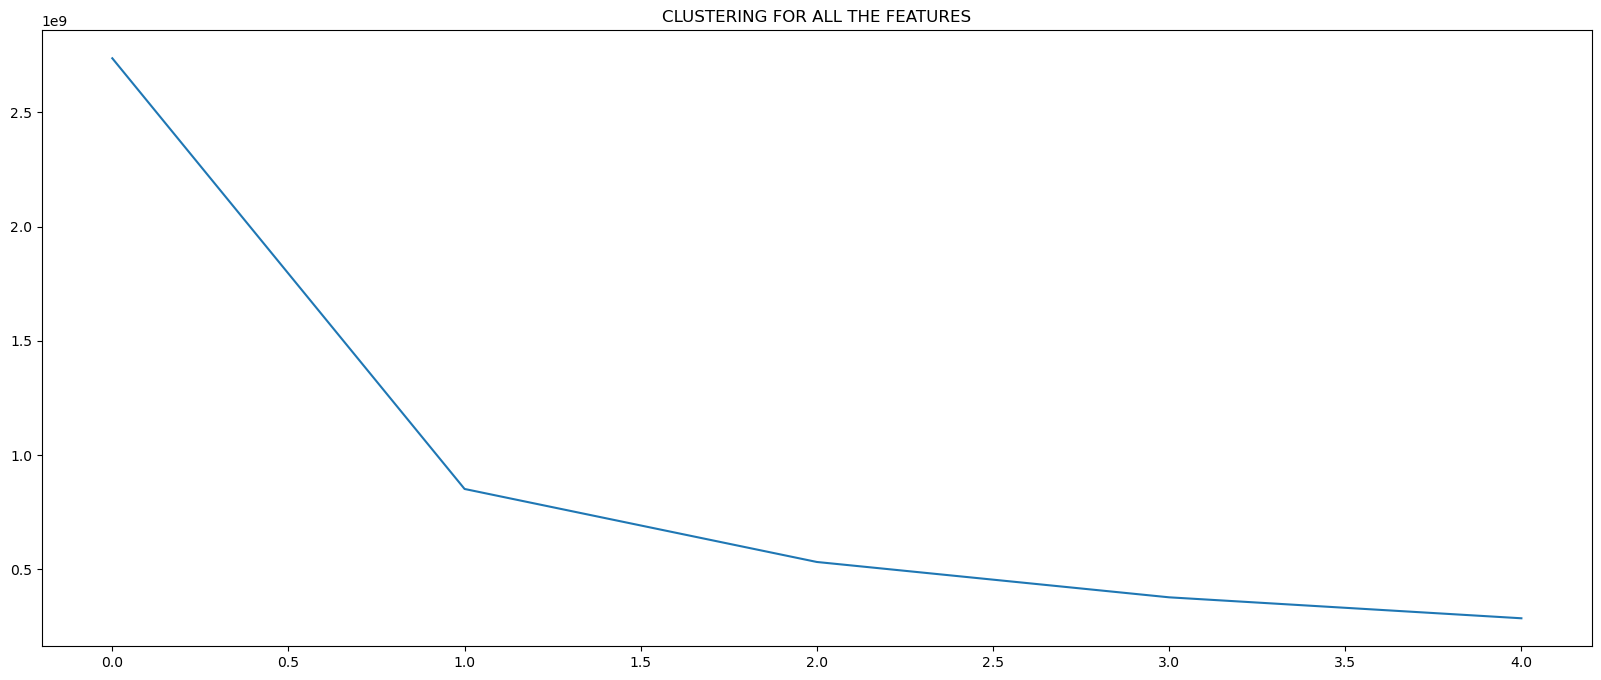

In [182]:
clust = []
range_n_clusters = [2,4,6,8,10]
for num_clusters in range_n_clusters:
    k_Means= KMeans(n_clusters = num_clusters)
    k_Means.fit(X)
    clust.append(k_Means.inertia_)
plt.figure(figsize=(20,8))
plt.plot(clust)
plt.title("CLUSTERING FOR ALL THE FEATURES")
plt.show()

In [183]:
df['Cluster_ID'] = k_Means.labels_

In [184]:
def illustrate_cluster(column,x='Cluster_ID',data=df):
    fig = plt.figure(figsize=(20,8))
    sns.boxplot(y='age',x=x,data=data)
    plt.title(f"CLUSTERS FOR {column}")
    plt.show()

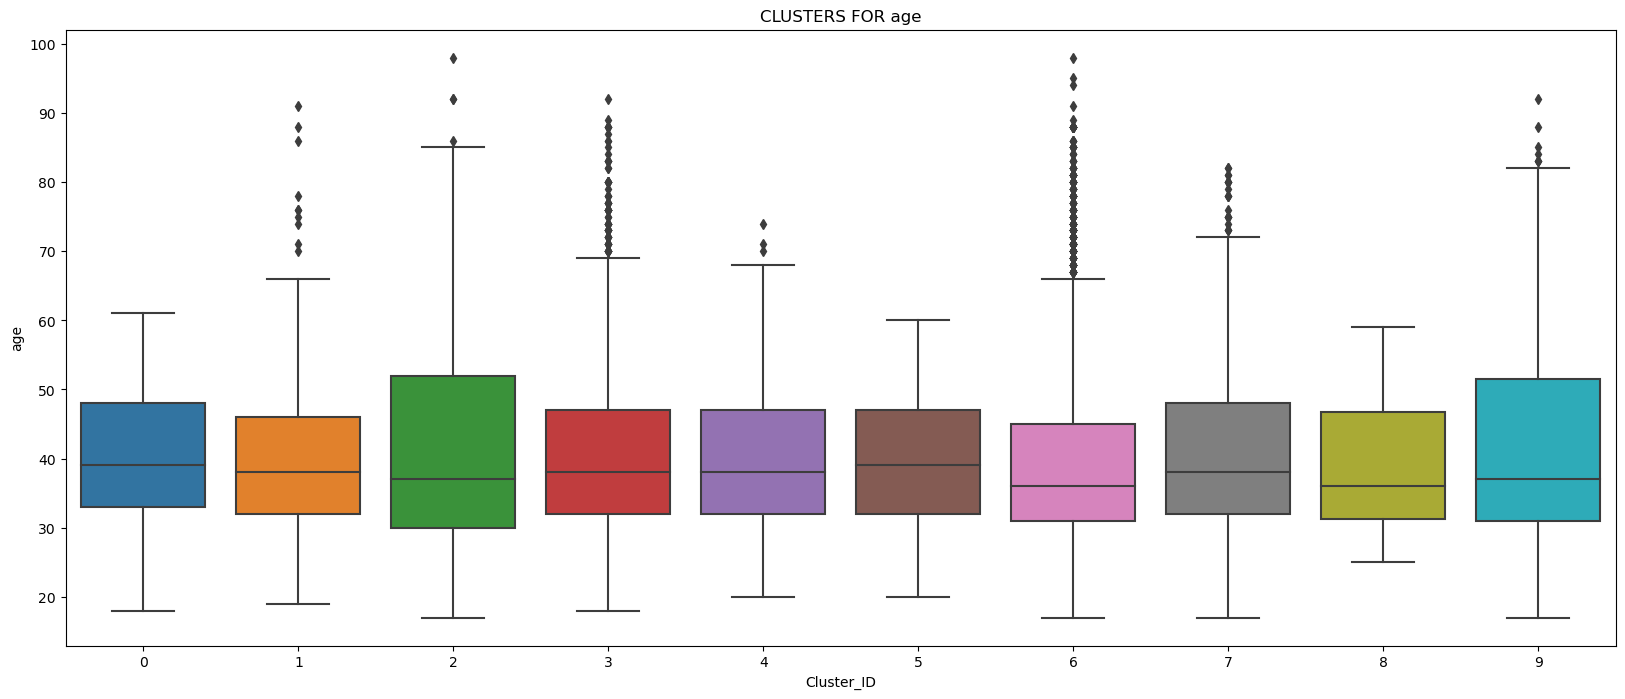

In [185]:
illustrate_cluster("age")

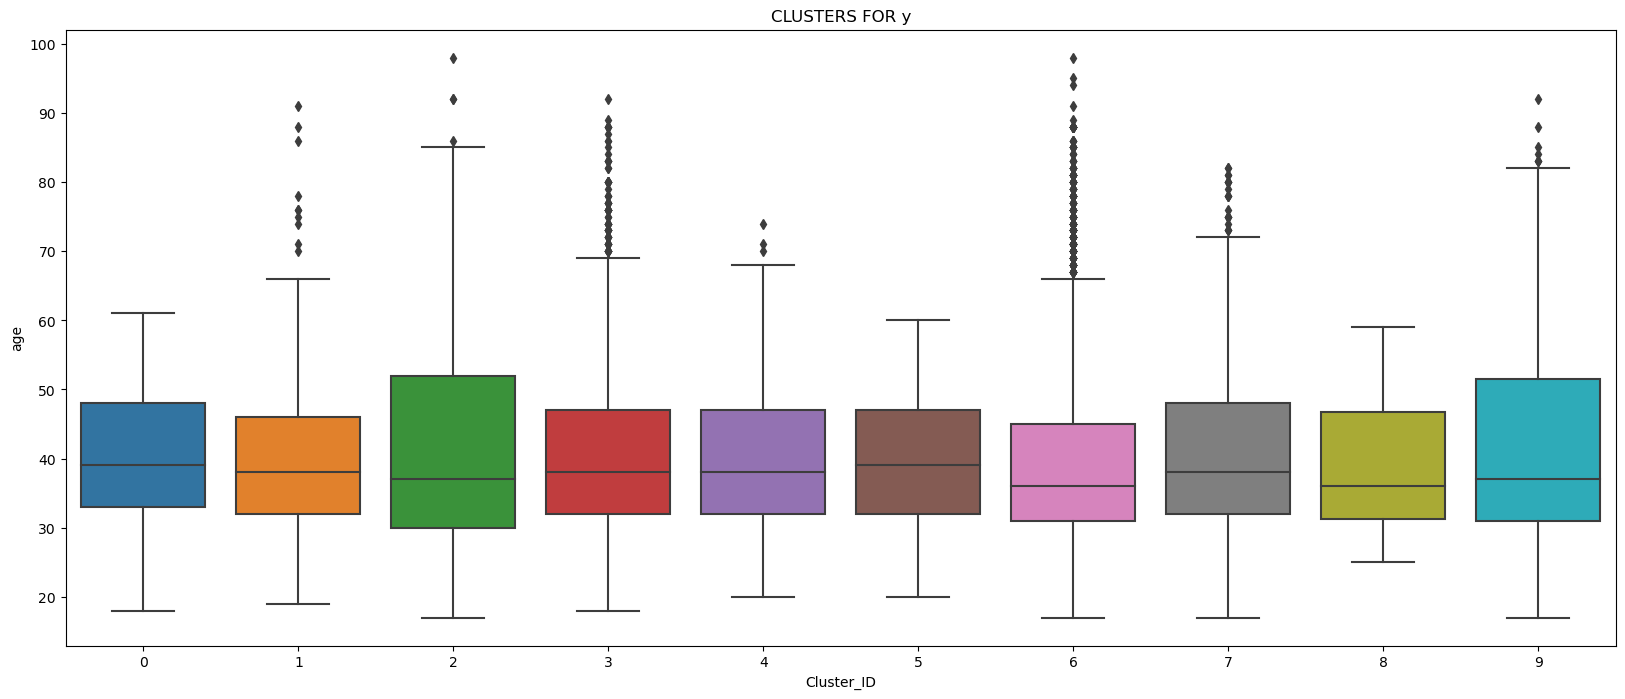

In [186]:
illustrate_cluster("y")

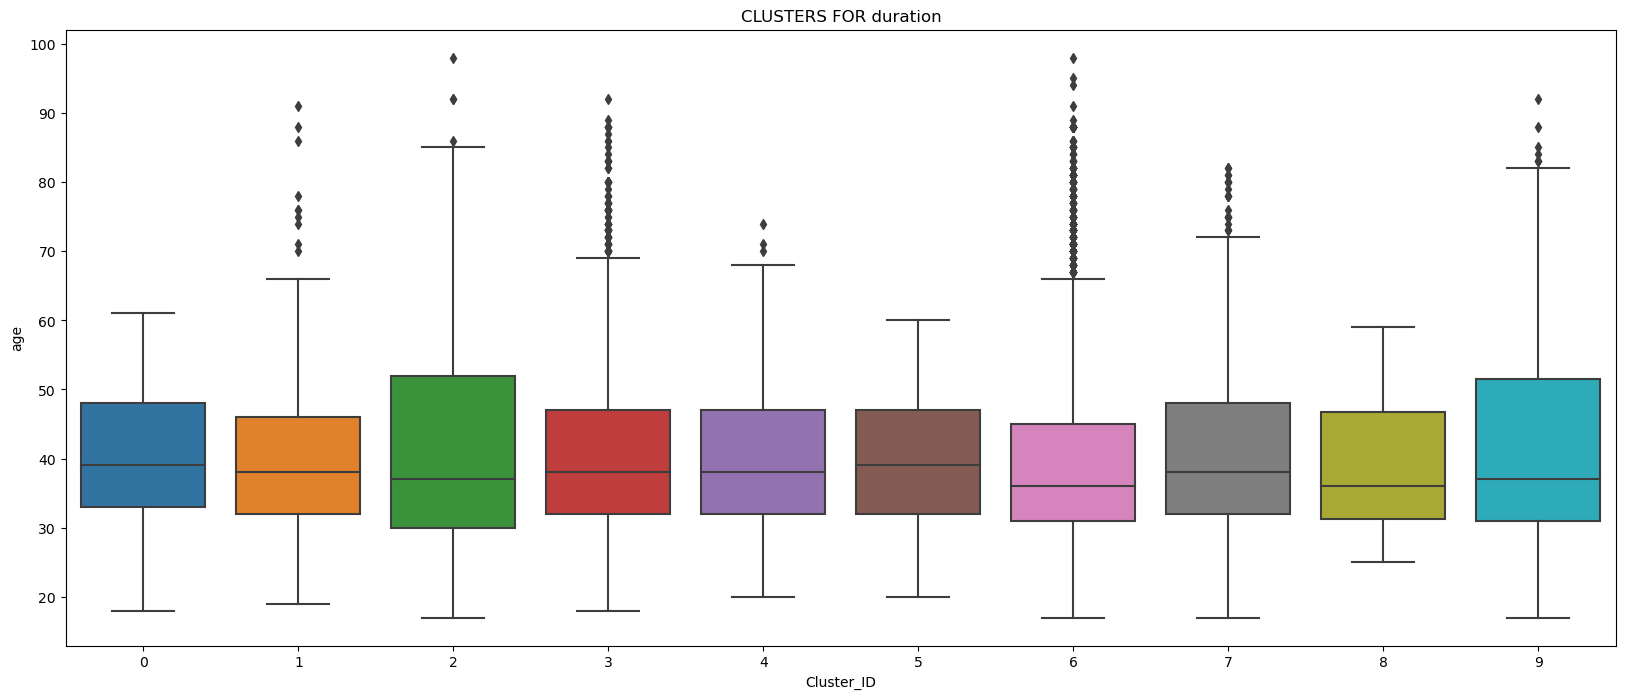

In [187]:
illustrate_cluster("duration")

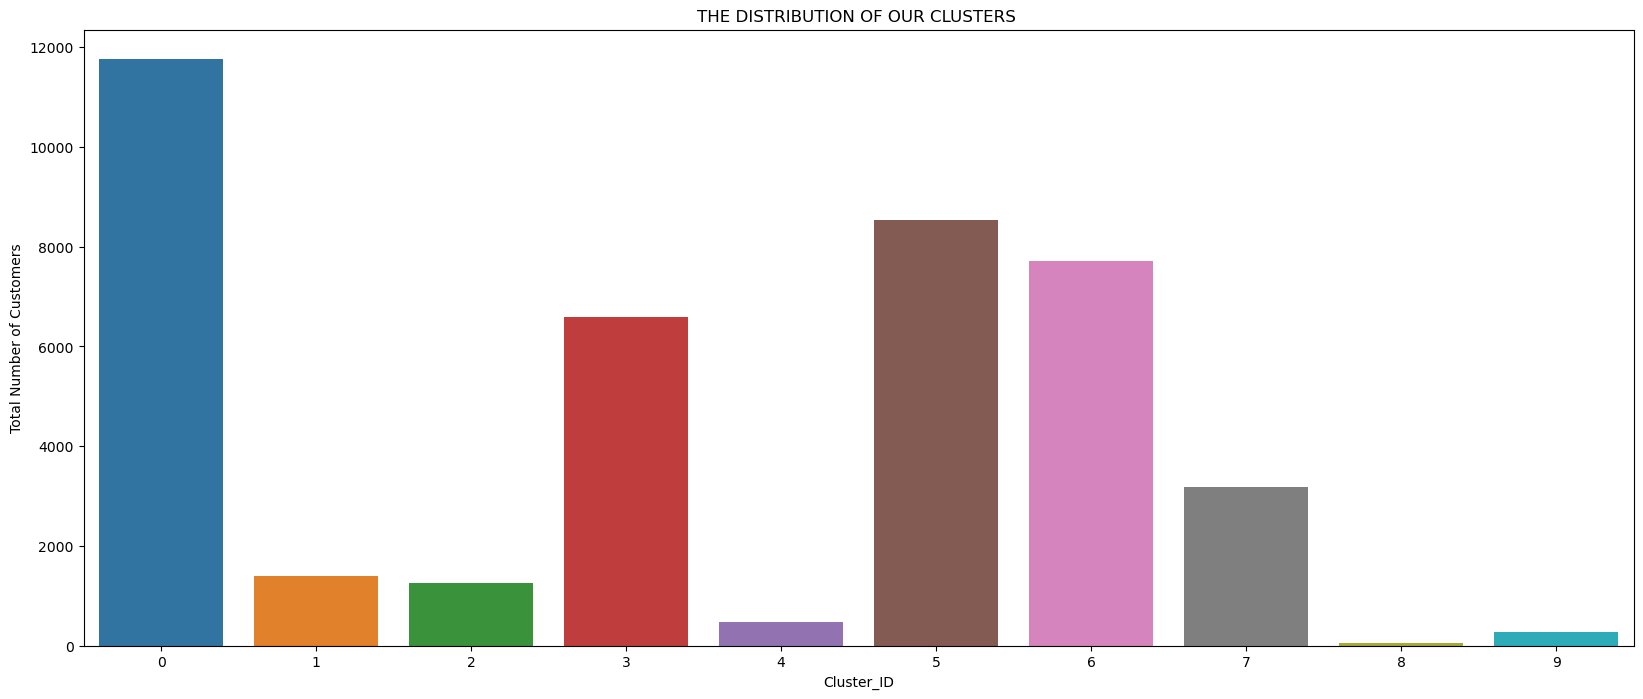

In [189]:
plt.figure(figsize=(20,8))
sns.countplot(x='Cluster_ID',data=df)
plt.ylabel("Total Number of Customers")
plt.title("THE DISTRIBUTION OF OUR CLUSTERS ")
plt.show()